In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 128MB/s]


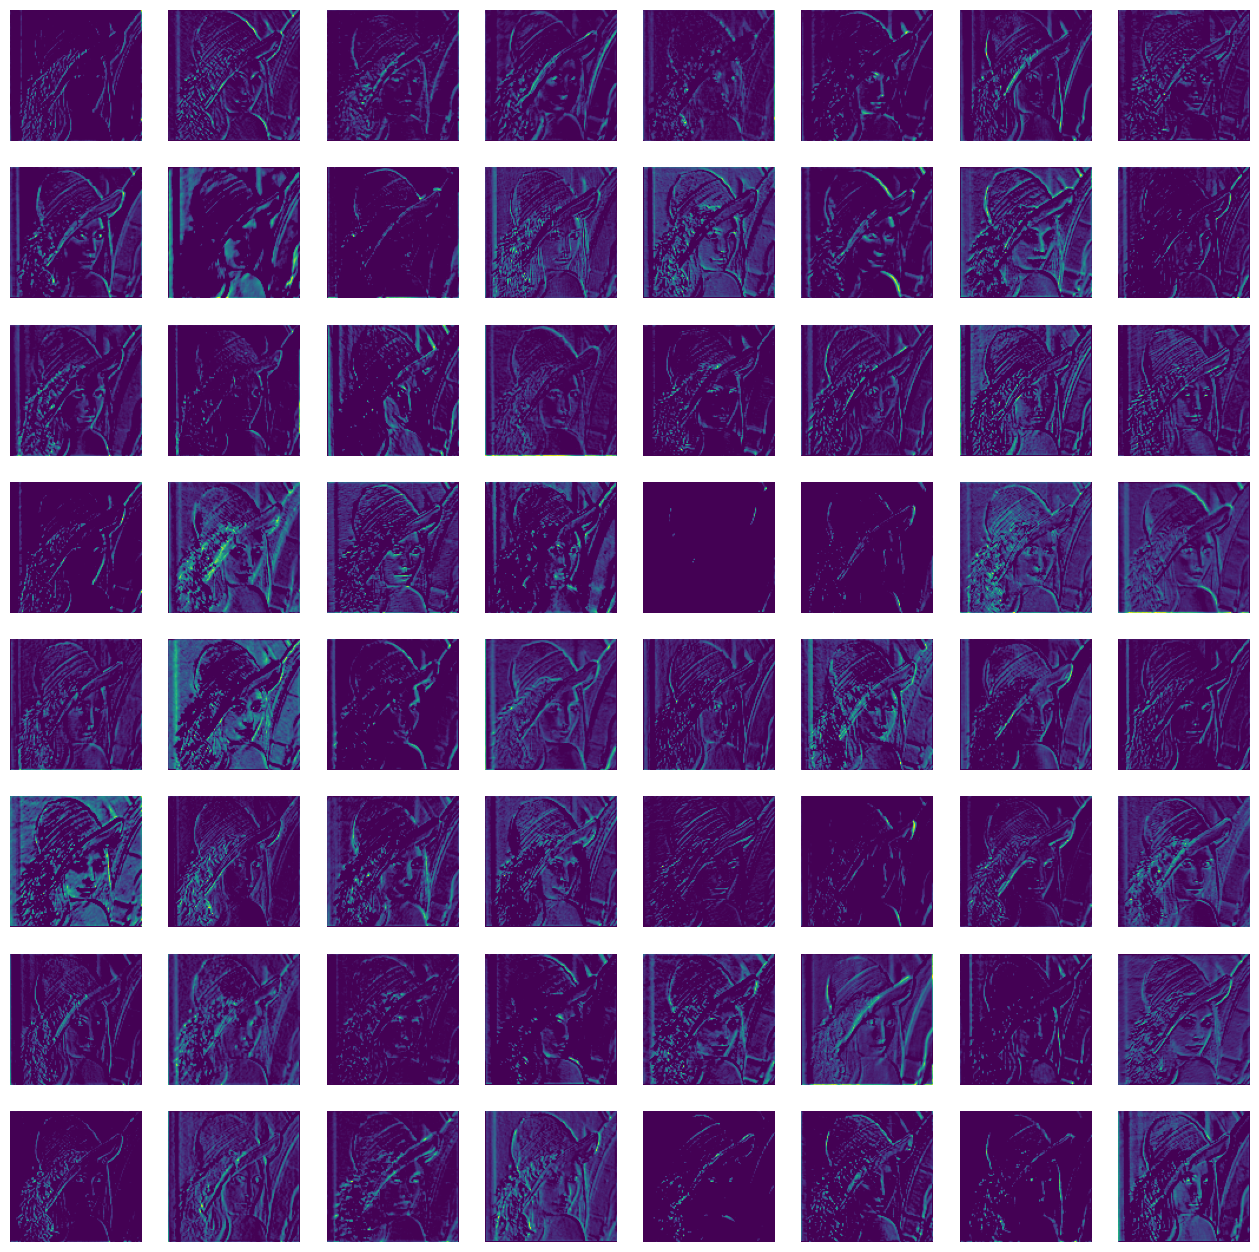

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

vgg = models.vgg16(pretrained=True)

features = []

def save_features(module, input, output):
    features.append(output)

layer_index = 5
vgg.features[layer_index].register_forward_hook(save_features)

image_path = '/content/lenna.png'
image = Image.open(image_path)
normalize = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = normalize(image).unsqueeze(0)

vgg(image)

feature_maps = features[0].squeeze(0).detach().numpy()
feature_maps *= 255/np.max(feature_maps)
# Plot the feature maps
fig, axs = plt.subplots(8, 8, figsize=(16, 16))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[i*8 + j], cmap='viridis')
        axs[i, j].axis('off')
plt.show()


In [ ]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = 'Dogo.jpg'
image = Image.open(image_path)
normalize = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = normalize(image).unsqueeze(0)

vgg = models.alexnet(pretrained=True)

captured_indices = [1, 4, 7, 9, 11]
features = []
def save_features(module, input, output):
    features.append(output)

for i in captured_indices:
    vgg.features[i].register_forward_hook(save_features)


output = vgg(image)




c:\Users\sumon\miniconda3\envs\smai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sumon\miniconda3\envs\smai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\sumon/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:40<00:00, 6.07MB/s] 


In [3]:
[print(layer.shape) for layer in features]

torch.Size([1, 64, 55, 55])
torch.Size([1, 192, 27, 27])
torch.Size([1, 384, 13, 13])
torch.Size([1, 256, 13, 13])
torch.Size([1, 256, 13, 13])


[None, None, None, None, None]

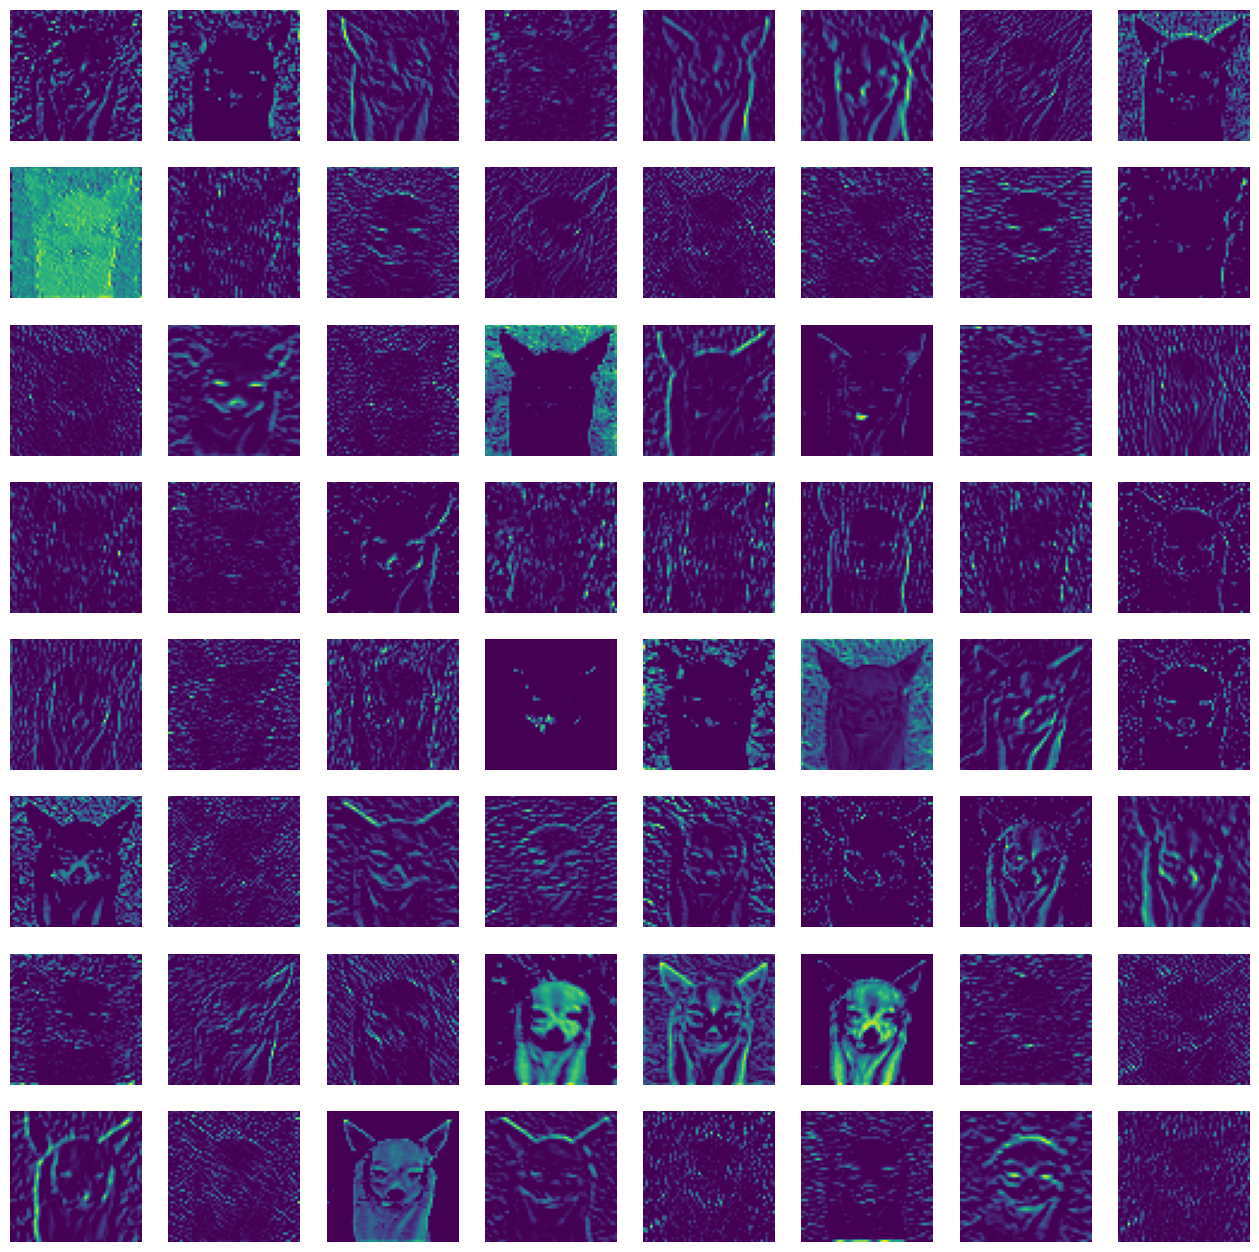

In [4]:
feature_maps = features[0].squeeze(0).detach().numpy()
# feature_maps *= 255/np.max(feature_maps)
# Plot the feature maps
fig, axs = plt.subplots(8, 8, figsize=(16, 16))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[i*8 + j], cmap='viridis')
        axs[i, j].axis('off')
plt.show()

In [5]:
alexnet = models.alexnet(pretrained=True)
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

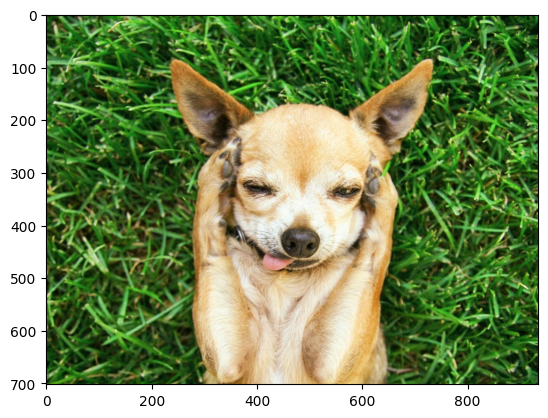

In [7]:
img = Image.open("Dogo.jpg")
plt.imshow(img)
plt.show()

for conv 1


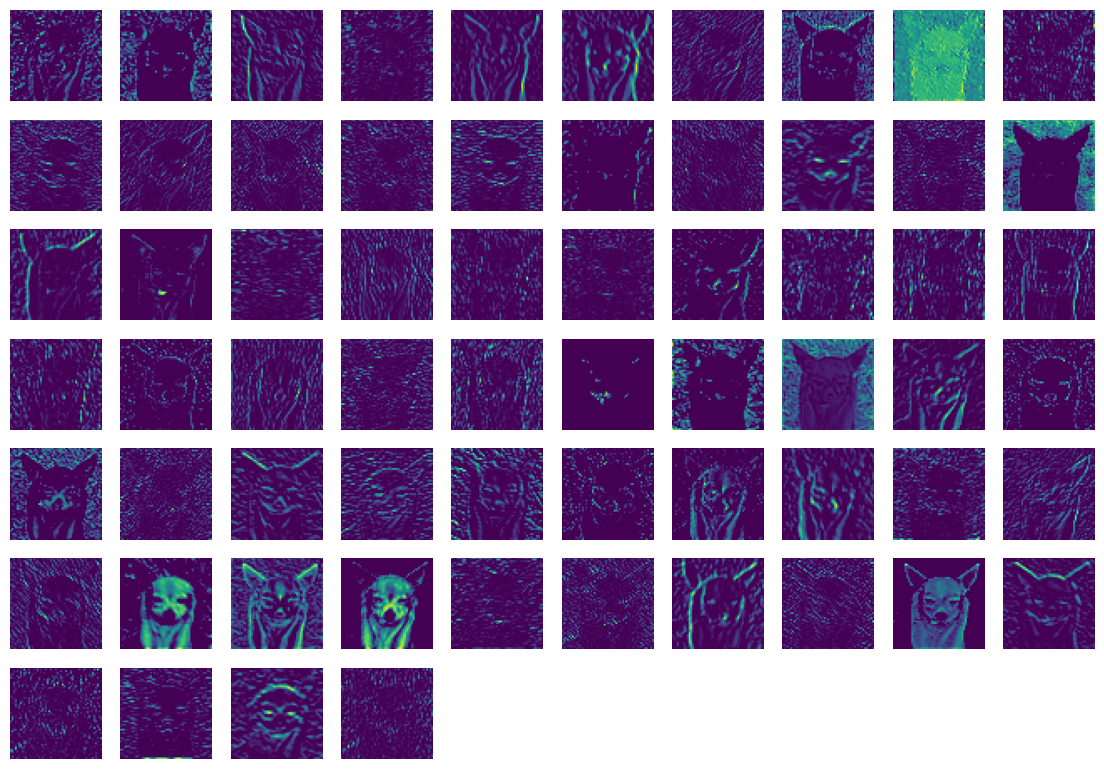

for conv 2


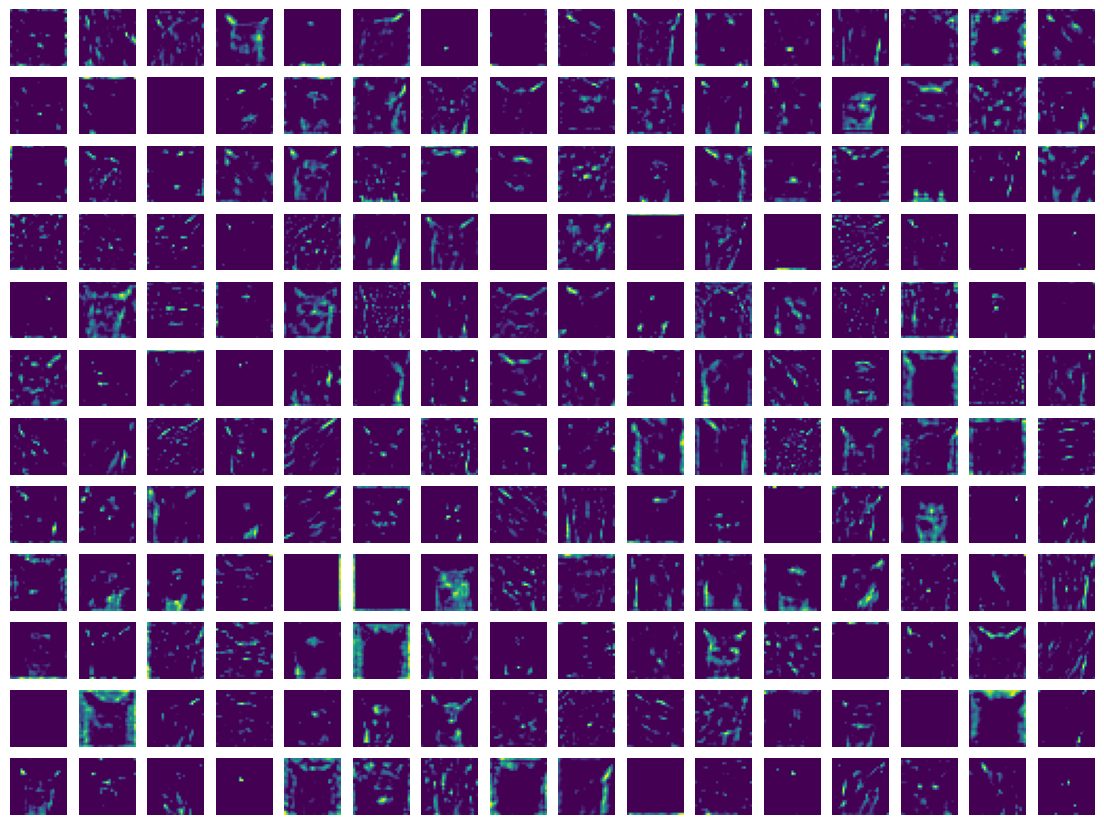

for conv 3


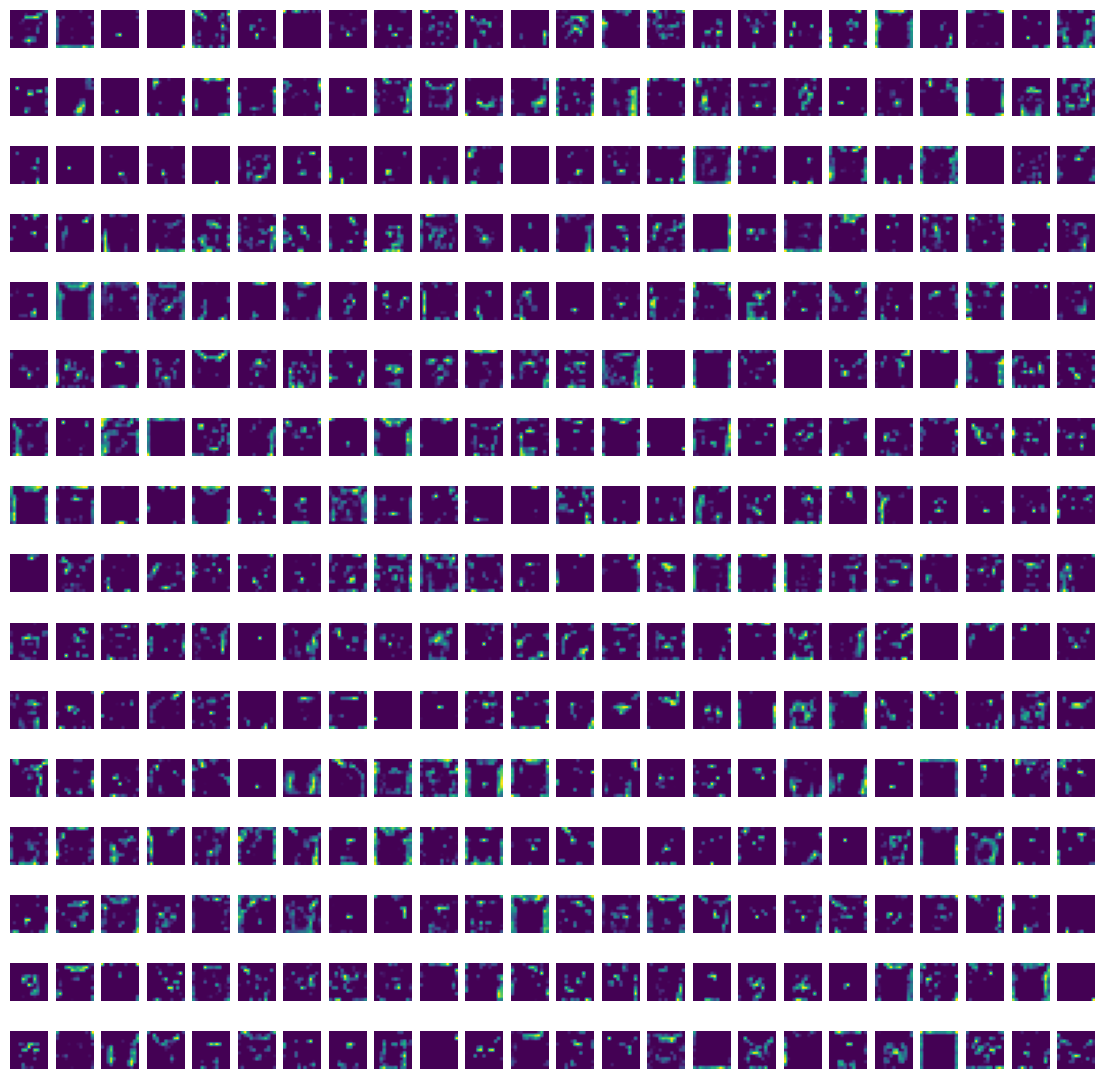

for conv 4


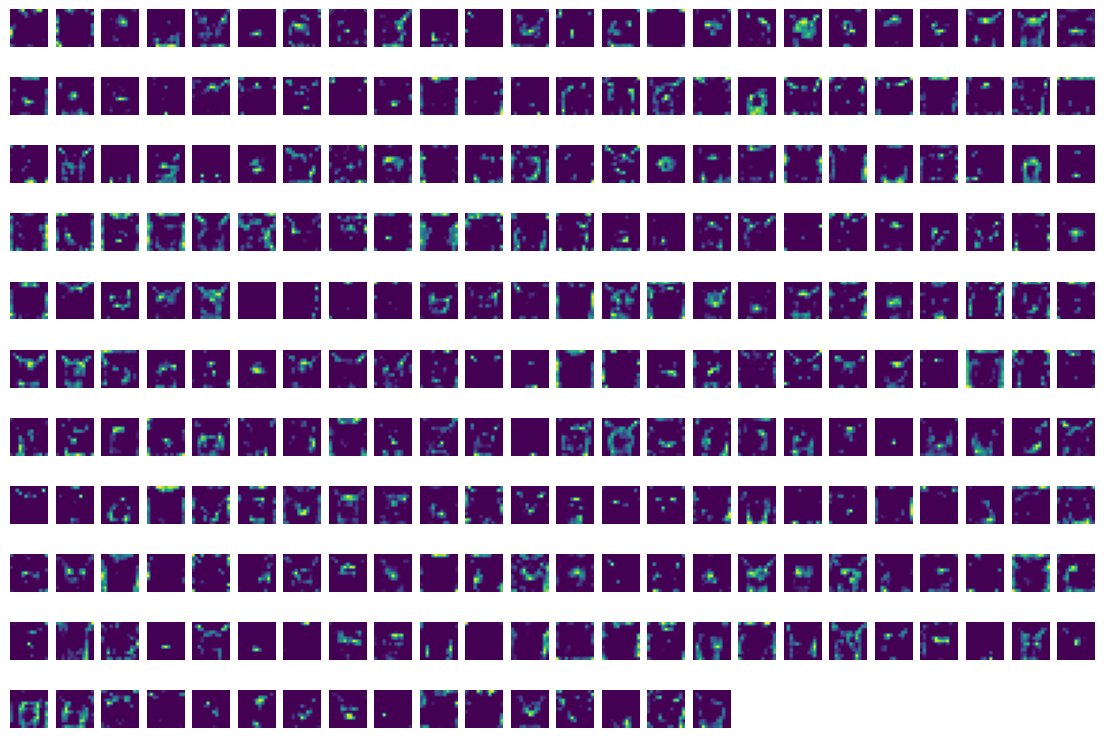

for conv 5


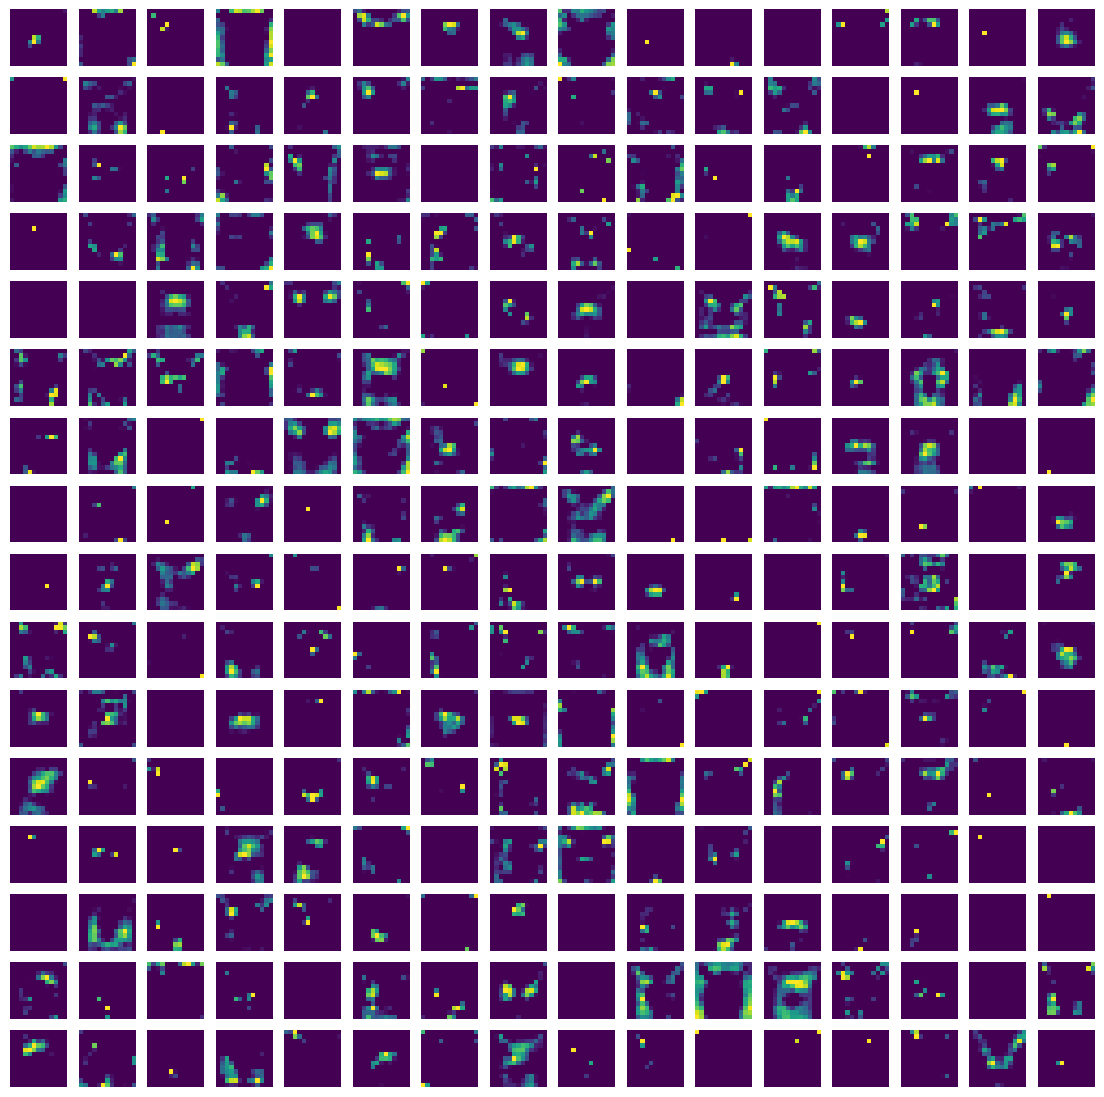

In [8]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt

alexnet = models.alexnet(pretrained=True)

#hook function
def get_activation(name, activations):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

#adding hook function to layers
activations = {}
alexnet.features[0].register_forward_hook(get_activation('conv1', activations))
alexnet.features[3].register_forward_hook(get_activation('conv2', activations))
alexnet.features[6].register_forward_hook(get_activation('conv3', activations))
alexnet.features[8].register_forward_hook(get_activation('conv4', activations))
alexnet.features[10].register_forward_hook(get_activation('conv5', activations))


#Forward pass
image_path = 'Dogo.jpg'
image = Image.open(image_path)
normalize = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = normalize(image).unsqueeze(0)
output = alexnet(image)
# Step 6: Visualize the activations
print("for conv 1")
plt.figure(figsize=(14, 14))
for i in range(64):
    plt.subplot(10, 10, i+1)
    plt.imshow(activations['conv1'][0][i], cmap='viridis')
    plt.axis('off')
plt.show()
print("for conv 2")
plt.figure(figsize=(14, 14))
for i in range(192):
    plt.subplot(16, 16, i+1)
    plt.imshow(activations['conv2'][0][i], cmap='viridis')
    plt.axis('off')
plt.show()
print("for conv 3")
plt.figure(figsize=(14, 14))
for i in range(384):
    plt.subplot(16, 24, i+1)
    plt.imshow(activations['conv3'][0][i], cmap='viridis')
    plt.axis('off')
plt.show()
print("for conv 4")
plt.figure(figsize=(14, 14))
for i in range(256):
    plt.subplot(16, 24, i+1)
    plt.imshow(activations['conv4'][0][i], cmap='viridis')
    plt.axis('off')
plt.show()
print("for conv 5")
plt.figure(figsize=(14, 14))
for i in range(256):
    plt.subplot(16, 16, i+1)
    plt.imshow(activations['conv5'][0][i], cmap='viridis')
    plt.axis('off')
plt.show()


visualisation of filter of the first conv layer


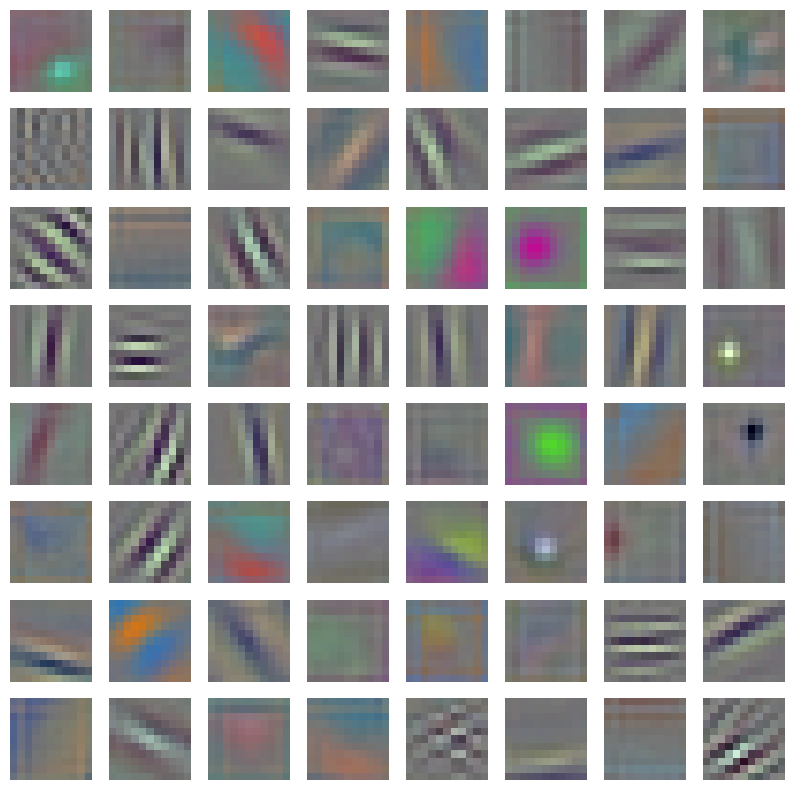

In [9]:
filters = alexnet.features[0].weight.data

filters -= filters.min()
filters /= filters.max()

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < filters.size(0):
        ax.imshow(filters[i].permute(1, 2, 0))
    ax.axis('off')

print("visualisation of filter of the first conv layer")
plt.show()

visualisation of filter of the first conv layer


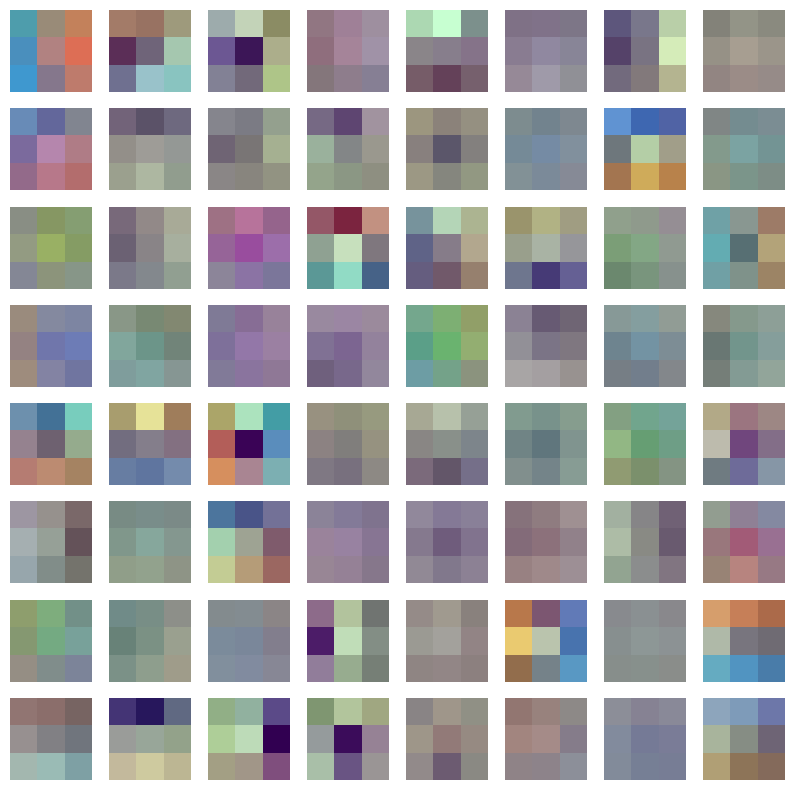

In [ ]:
filters = vgg.features[0].weight.data

filters -= filters.min()
filters /= filters.max()

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < filters.size(0):
        ax.imshow(filters[i].permute(1, 2, 0))
    ax.axis('off')

print("visualisation of filter of the first conv layer")
plt.show()

In [3]:
from torch import nn

In [4]:
class ZFNet1(nn.Module):
    def __init__(self, num_classes):
        super(ZFNet1, self).__init__()
        #first layer
        self.conv1 = nn.Conv2d(3, 96, kernel_size=7, stride=2, padding=1) # 110, 110, 96
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)# 55, 55, 96
        self.norm1 = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)# 55, 55, 96
        #second layer
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, stride=2, padding=0)# 26, 26, 256 
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)# 13, 13, 256
        self.norm2 = nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2)# 13, 13, 256
        #third layer
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1)# 13, 13, 384
        #fourth layer
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1)# 13, 13, 384
        #fifth layer
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1)# 13, 13, 256
        self.pool5 = nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)# 6, 6, 256
        #sixth layer
        self.fc6 = nn.Linear(9216, 4096)
        self.drop6 = nn.Dropout()
        #seventh layer
        self.fc7 = nn.Linear(4096, 4096)
        self.drop7 = nn.Dropout()
        #eighth layer
        self.fc8 = nn.Linear(4096, num_classes)
        
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)
        x = self.norm1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool2(x)
        x = self.norm2(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        
        x = self.conv4(x)
        x = self.relu(x)
        
        x = self.conv5(x)
        x = self.relu(x)
        x = self.pool5(x)
        
        x = x.view(-1, 9216)
        
        x = self.fc6(x)
        x = self.relu(x)
        x = self.drop6(x)
        
        x = self.fc7(x)
        x = self.relu(x)
        x = self.drop7(x)
        
        x = self.fc8(x)
        
        return x


In [5]:
print(alexnet)

NameError: name 'alexnet' is not defined

In [1]:
from torch import nn
class AlexnetDeconv(nn.Module):
    
    def __init__(self):
        super(AlexnetDeconv, self).__init__()
        

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2, bias=False),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, return_indices=True),
            nn.Conv2d(64, 192, kernel_size=5, stride=1, padding=2, bias=False),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, return_indices=True),
            nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0, return_indices=True)
        )
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=9216, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(in_features=4096, out_features=4096, bias=True),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=4096, out_features=1000, bias=True)
        )
        self.deconv = nn.Sequential(
            nn.MaxUnpool2d(kernel_size=3, stride=2, padding=0),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 384, kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(384, 192, kernel_size=3, stride=1, padding=1, bias=False),
            nn.MaxUnpool2d(kernel_size=3, stride=2, padding=0),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(192, 64, kernel_size=5, stride=1, padding=2, bias=False),
            nn.MaxUnpool2d(kernel_size=3, stride=2, padding=0),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=11, stride=4, padding=2, bias=False),
        )
        
        self.outputs = [0]*len(self.features)
        self.indices = dict()
        self.sizes = dict()

    def forward(self, x):
        for i, layer in enumerate(self.features):
            if isinstance(layer, nn.MaxPool2d):
                x, indices = layer(x)
                self.outputs[i] = x
                self.indices[i] = indices
            else:
                x = layer(x)
                self.outputs[i] = x
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    
    def deconv_forward(self, x, layer):

        if layer<1 or layer >5:
            return False

        if layer == 5:
            x = self.deconv[0](x, self.indices[12], output_size=self.outputs[-2].shape[-2:])
            x = self.deconv[1](x)
            x = self.deconv[2](x)
            layer-=1
      
        if layer == 4:
            x = self.deconv[3](x)
            x = self.deconv[4](x)
            layer-=1
        
        if layer == 3:
            x = self.deconv[5](x)
            x = self.deconv[6](x)
            layer-=1
        
        if layer == 2:
            x = self.deconv[7](x, self.indices[5], output_size=self.outputs[4].shape[-2:])
            x = self.deconv[8](x)
            x = self.deconv[9](x)
            layer-=1
     
        if layer == 1:
            x = self.deconv[10](x, self.indices[2], output_size=self.outputs[1].shape[-2:])
            x = self.deconv[11](x)
            x = self.deconv[12](x)

        return x
        


In [2]:
model = AlexnetDeconv()
print(model.state_dict().keys())

odict_keys(['features.0.weight', 'features.3.weight', 'features.6.weight', 'features.8.weight', 'features.10.weight', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias', 'deconv.2.weight', 'deconv.4.weight', 'deconv.6.weight', 'deconv.9.weight', 'deconv.12.weight'])


In [3]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)
alexnet_weights = alexnet.state_dict()
print(alexnet_weights.keys())

c:\Users\sumon\miniconda3\envs\smai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sumon\miniconda3\envs\smai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias'])


In [4]:
import torch
# new_dict = dict()
# for key in alexnet_weights.keys():
#     if key in model.state_dict().keys():
#         new_dict[key] = alexnet_weights[key]
# new_dict['deconv.2.weight'] = torch.flip(torch.flip(alexnet_weights['features.10.weight'], dims=[2]), dims=[3])
# new_dict['deconv.4.weight'] = torch.flip(torch.flip(alexnet_weights['features.8.weight'], dims=[2]), dims=[3])
# new_dict['deconv.6.weight'] = torch.flip(torch.flip(alexnet_weights['features.6.weight'], dims=[2]), dims=[3])
# new_dict['deconv.9.weight'] = torch.flip(torch.flip(alexnet_weights['features.3.weight'], dims=[2]), dims=[3])
# new_dict['deconv.12.weight'] = torch.flip(torch.flip(alexnet_weights['features.0.weight'], dims=[2]), dims=[3])
# model_dict = model.state_dict()
# model_dict.update(new_dict)
# model.load_state_dict(model_dict)

# new_dict = dict()
# for key in alexnet_weights.keys():
#     if key in model.state_dict().keys():
#         new_dict[key] = alexnet_weights[key]
# new_dict['deconv.2.weight'] = torch.transpose(alexnet_weights['features.10.weight'],2, 3)
# new_dict['deconv.4.weight'] = torch.transpose(alexnet_weights['features.8.weight'], 2, 3)
# new_dict['deconv.6.weight'] = torch.transpose(alexnet_weights['features.6.weight'], 2, 3)
# new_dict['deconv.9.weight'] = torch.transpose(alexnet_weights['features.3.weight'], 2, 3)
# new_dict['deconv.12.weight'] = torch.transpose(alexnet_weights['features.0.weight'], 2, 3)
# model_dict = model.state_dict()
# model_dict.update(new_dict)
# model.load_state_dict(model_dict)

new_dict = dict()
for key in alexnet_weights.keys():
    if key in model.state_dict().keys():
        new_dict[key] = alexnet_weights[key]
new_dict['deconv.2.weight'] = alexnet_weights['features.10.weight']
new_dict['deconv.4.weight'] = alexnet_weights['features.8.weight']
new_dict['deconv.6.weight'] = alexnet_weights['features.6.weight']
new_dict['deconv.9.weight'] = alexnet_weights['features.3.weight']
new_dict['deconv.12.weight'] = alexnet_weights['features.0.weight']
model_dict = model.state_dict()
model_dict.update(new_dict)
model.load_state_dict(model_dict)


<All keys matched successfully>

In [5]:
from PIL import Image

def image_preprocess(image_path=None):
    image = Image.open(image_path)
    normalize = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = normalize(image).unsqueeze(0)
    return image

In [6]:
def adjust(inp):
    inp = (inp-np.min(inp))/(np.max(inp)-np.min(inp))
    inp*=255
    inp= inp.astype(int)
    return inp

In [7]:
def plot_(activations, n):
    plt.figure(figsize=(14, 14))
    for i in range(n):
        plt.subplot(int(np.ceil(n/10)), 10, i+1)
        plt.imshow(activations[i], cmap='viridis')
        plt.axis('off')
    plt.show()

In [8]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image = image_preprocess("Dogo.jpg")


captured_indices = [2, 5, 7, 9, 12]
features = []
def save_features(module, input, output):
    features.append(output)

for i in captured_indices:
    model.features[i].register_forward_hook(save_features)
model.eval()
with torch.no_grad():
    output = model(image)

In [9]:
for i in model.outputs:
    print(i.shape)

torch.Size([1, 64, 55, 55])
torch.Size([1, 64, 55, 55])
torch.Size([1, 64, 27, 27])
torch.Size([1, 192, 27, 27])
torch.Size([1, 192, 27, 27])
torch.Size([1, 192, 13, 13])
torch.Size([1, 384, 13, 13])
torch.Size([1, 384, 13, 13])
torch.Size([1, 256, 13, 13])
torch.Size([1, 256, 13, 13])
torch.Size([1, 256, 13, 13])
torch.Size([1, 256, 13, 13])
torch.Size([1, 256, 6, 6])


In [270]:
# features = [layer.detach().numpy() for layer in list(features)]

In [271]:
features = [f[0].detach() for f in features]

In [272]:
for i in list(features):
    print(i.shape)

torch.Size([1, 64, 27, 27])
torch.Size([1, 192, 13, 13])
torch.Size([384, 13, 13])
torch.Size([256, 13, 13])
torch.Size([1, 256, 6, 6])


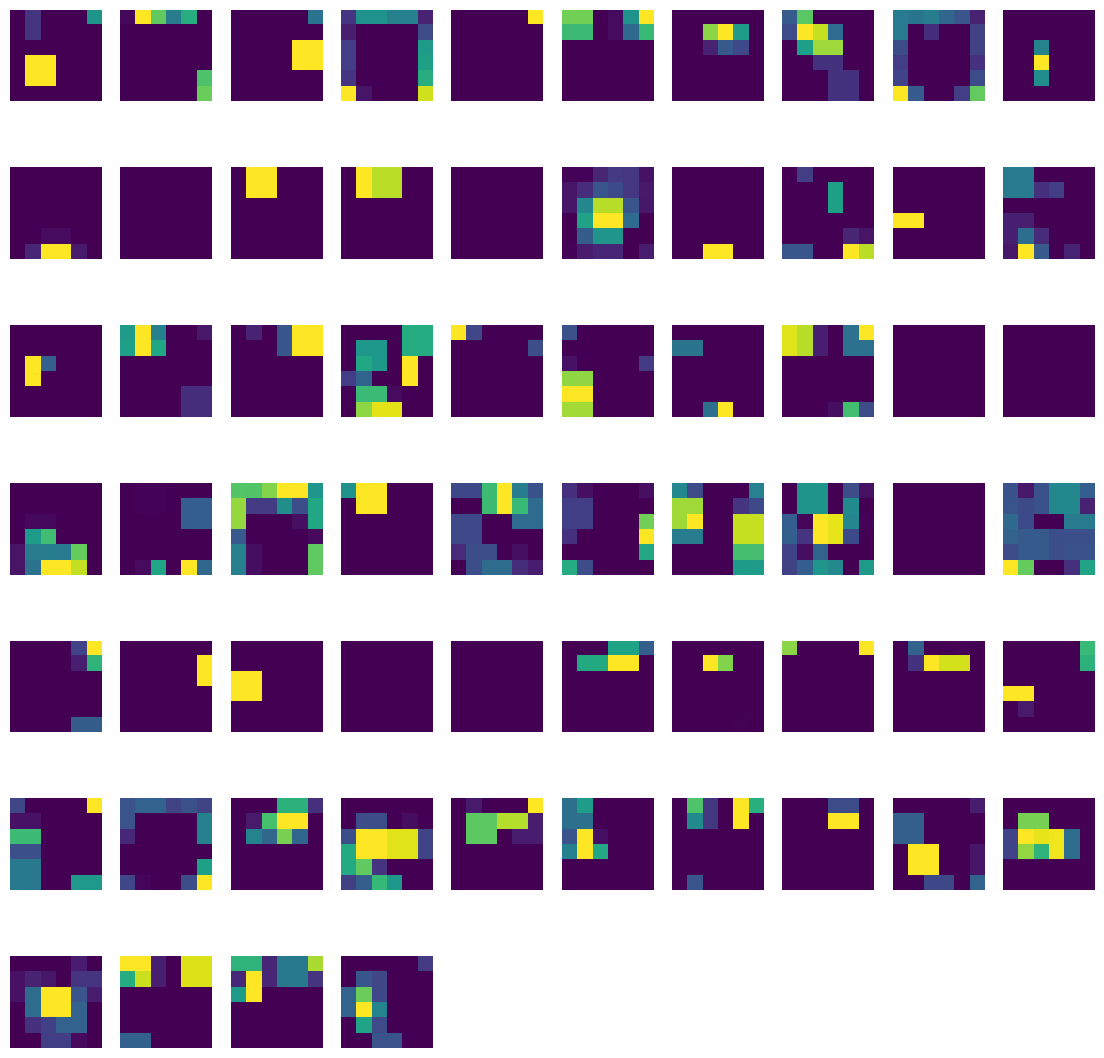

In [21]:
plot_(model.outputs[12][0].detach().numpy(), 64)

In [26]:
x = model.outputs[12].detach().clone()
temp = torch.tensor([[0]*6]*6)
# temp2 = torch.tensor([[torch.max(features[4])]*6]*6)
for i in range(0, 256):
    if i!=60:
        x[0][i]=temp
    # else:
    #     x[0][i]=temp2
x = torch.tensor(x)
# res = model.deconv_forward(x, 5).detach().numpy()

C:\Users\sumon\AppData\Local\Temp\ipykernel_11556\60390341.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


In [44]:
res = model.deconv_forward(model.outputs[7], 3).detach().numpy()

In [24]:
res.shape

(1, 3, 223, 223)

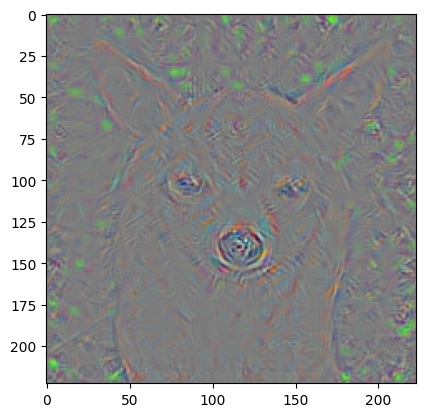

In [45]:
res = np.transpose(res[0], (1, 2, 0))
res = adjust(res)
plt.imshow(res)
plt.show()

In [191]:
array = [[[1,2],[3,4]], [[5,6],[7, 8]]]
print(np.asarray(array).shape)
array = torch.tensor(array)
print(array)
arr1 = torch.flip(array, dims=[1])
print(arr1)
arr1 = torch.flip(arr1, dims=[2])
print(arr1)
print(torch.transpose(array, 1, 2))

(2, 2, 2)
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
tensor([[[3, 4],
         [1, 2]],

        [[7, 8],
         [5, 6]]])
tensor([[[4, 3],
         [2, 1]],

        [[8, 7],
         [6, 5]]])
tensor([[[1, 3],
         [2, 4]],

        [[5, 7],
         [6, 8]]])
